In [1]:
pip install pandas matplotlib seaborn nltk wordcloud 


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the CSV you saved earlier
df = pd.read_csv("tech_news_sentiment_results.csv")

# Check data
df.head()


,title,description,source,publishedAt,sentiment,text_length
0,Elden Ring: Nightreign's The Forsaken Hollows ...,Elden Ring: Nightreign DLC announced at Sony S...,Eurogamer.net,2025-11-11 22:55:55+00:00,positive,59
1,Gemini in Google Drive can now make Audio Over...,"After NotebookLM, Gemini, and Search, Audio Ov...",9to5google.com,2025-11-11 23:24:00+00:00,neutral,132
2,Octopath Traveler 0 Demo Now Available For Swi...,Get a head start!,Nintendo Life,2025-11-12 02:05:00+00:00,neutral,17
3,"Microsoft Fixes 63 Security Flaws, Including a...","Microsoft fixes 63 flaws, including an exploit...",Internet,2025-11-12 10:21:00+00:00,negative,96
4,Fei-Fei Li's World Labs speeds up the world mo...,Marble is different from competitors like Odys...,TechCrunch,2025-11-12 13:44:01+00:00,positive,191


In [3]:
df['text'] = df['title'].astype(str) + " " + df['description'].astype(str) #Clean and prepare text data


In [5]:
import nltk #text processing
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    text = text.lower()
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from collections import Counter #word frequency analysis

# Combine all text
all_words = " ".join(df['clean_text']).split()

# Count frequencies
word_freq = Counter(all_words)

# Convert to DataFrame
freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
freq_df


,Word,Frequency
0,new,8
1,iphone,5
2,even,4
3,users,4
4,ring,3
5,security,3
6,controller,3
7,pro,3
8,max,3
9,smart,3


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3748\926140760.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=freq_df, palette='viridis')


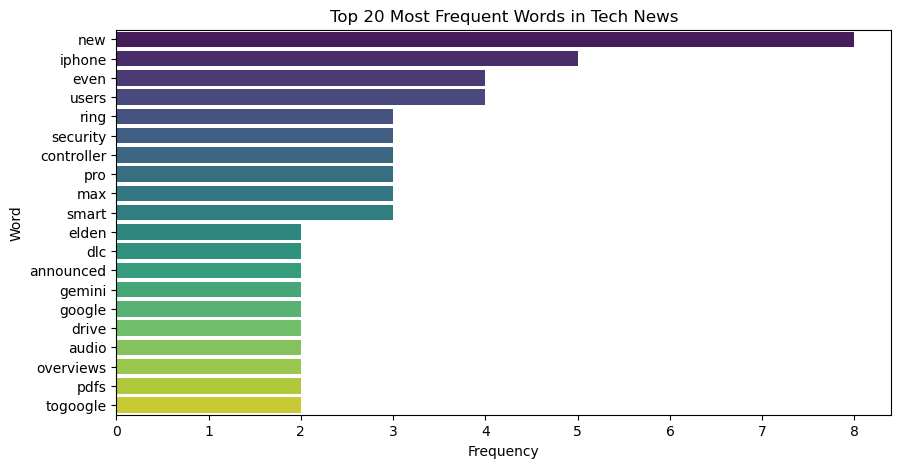

In [7]:
import matplotlib.pyplot as plt #visualise word frequency
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='Frequency', y='Word', data=freq_df, palette='viridis')
plt.title('Top 20 Most Frequent Words in Tech News')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


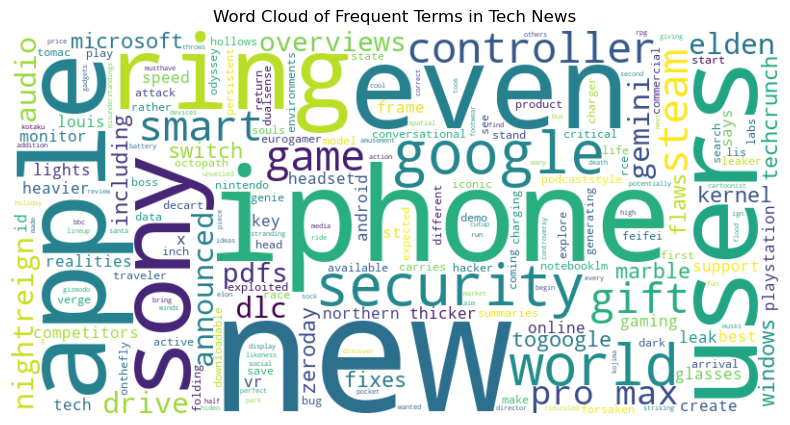

In [8]:
from wordcloud import WordCloud #word cloud visualisation

text = " ".join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Terms in Tech News')
plt.show()


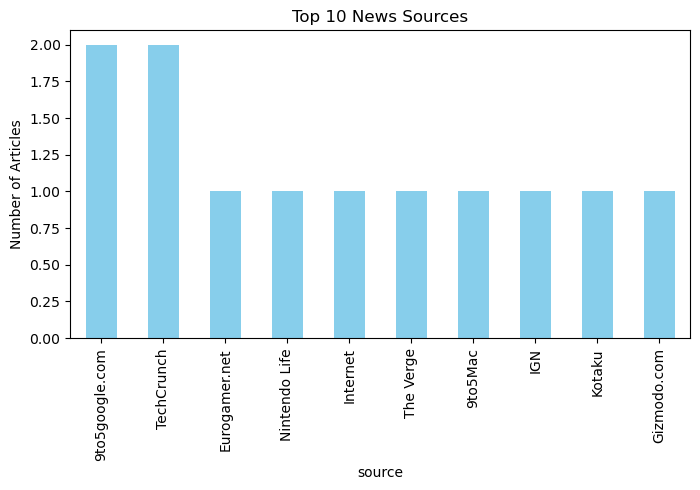

⚠️ Column 'country' not found in dataset.


In [9]:
#frequency by source
import matplotlib.pyplot as plt

# Check for 'source' column first
if 'source' in df.columns:
    source_counts = df['source'].value_counts().head(10)
    plt.figure(figsize=(8,4))
    source_counts.plot(kind='bar', color='skyblue')
    plt.title('Top 10 News Sources')
    plt.ylabel('Number of Articles')
    plt.show()
else:
    print("⚠️ Column 'source' not found in dataset.")

# Check for 'country' column
if 'country' in df.columns:
    country_counts = df['country'].value_counts().head(10)
    plt.figure(figsize=(8,4))
    country_counts.plot(kind='bar', color='orange')
    plt.title('Top 10 Countries Publishing Tech News')
    plt.ylabel('Number of Articles')
    plt.show()
else:
    print("⚠️ Column 'country' not found in dataset.")


In [10]:
freq_df.to_csv("tech_news_word_frequency.csv", index=False) #frequency results
print("✅ Word frequency results saved as tech_news_word_frequency.csv")


✅ Word frequency results saved as tech_news_word_frequency.csv
